# Logistic Regression:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from IPython.display import display


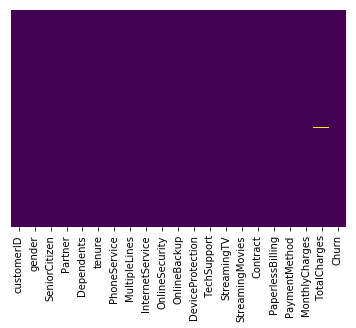

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df= df.replace(' ', np.NaN)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df['TotalCharges']=df['TotalCharges'].astype("float")

In [3]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df['SeniorCitizen']=pd.Categorical(df['SeniorCitizen']) #Changing from int to categorical

In [7]:
df.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [8]:
df.drop("customerID",1,inplace=True)

In [9]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [10]:
numerics = ['float64', 'int64']
numericalValues = df.select_dtypes(include=numerics)
objectValues = df.select_dtypes(exclude=numerics)

In [11]:
numericalValues.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [12]:
objectValues.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


[]

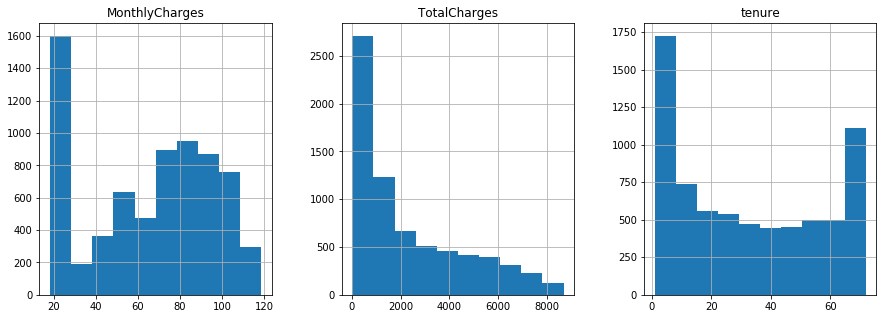

In [13]:
numericalValues.hist(layout=(1,3), figsize=(15,5))
plt.plot()

In [14]:
numericalValues = pd.concat([numericalValues,df["Churn"]],axis=1)

In [15]:
numericalValues.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes


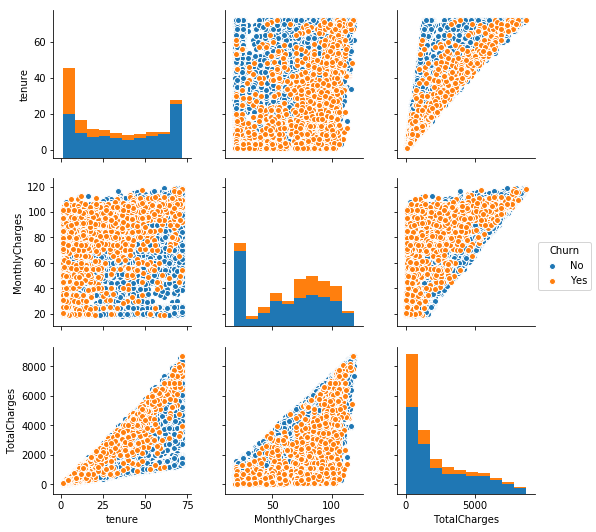

In [16]:
sns.pairplot(numericalValues,hue="Churn")

In [17]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

## Logistic Regression using only Numerical Attributes

In [18]:
from sklearn.model_selection import train_test_split

data = df

# Transform the categorical variables into binary vectors
dummy = pd.get_dummies(data)              

Y = dummy["Churn_Yes"].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(numericalValues[['tenure','MonthlyCharges','TotalCharges']], Y, test_size=0.333, random_state=101)

## Predictions on test data set using Numerical Attributes

In [19]:
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.784372331341
[[1509  242]
 [ 263  328]]
             precision    recall  f1-score   support

          0       0.85      0.86      0.86      1751
          1       0.58      0.55      0.57       591

avg / total       0.78      0.78      0.78      2342



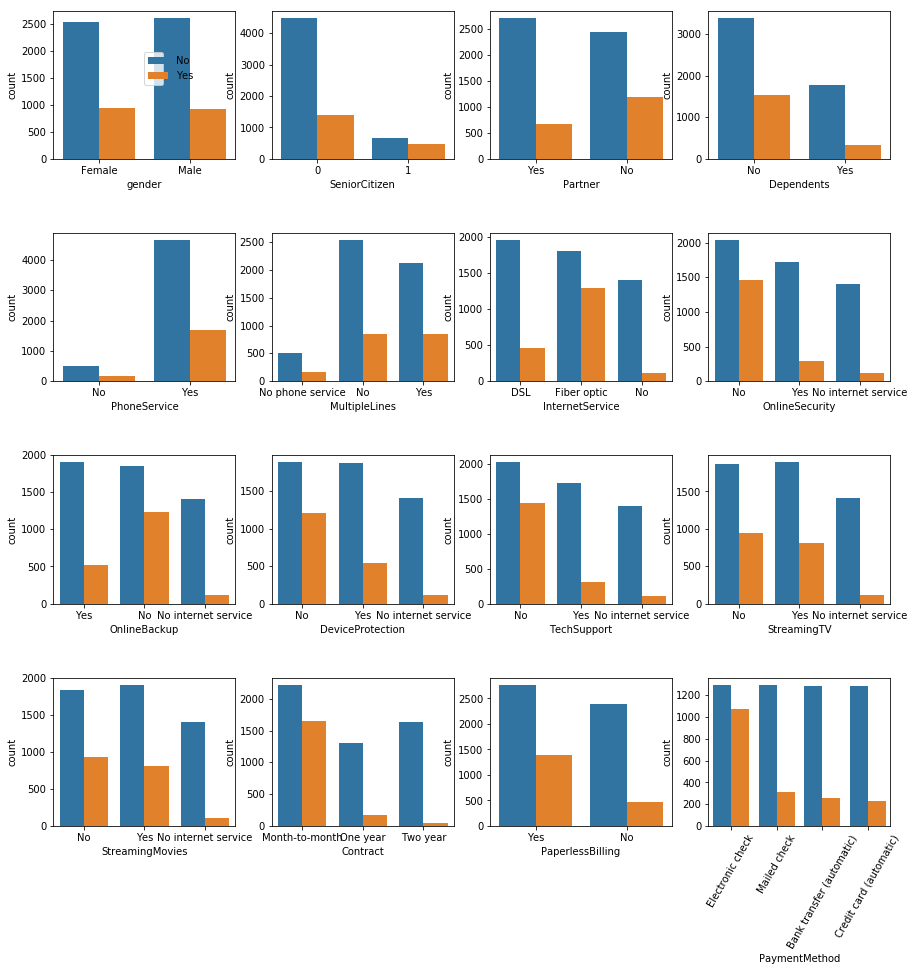

In [20]:
fig,ax = plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objectValues.iloc[:,i], hue=objectValues["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0.5, 0.5, 0.1, 0.4), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(60)

## Logistic regression using categorical variables

In [21]:
data=df
for i in list(data.columns):
    data[i] = pd.Categorical(data[i])     # Convert all the variables into categorical
dummy = pd.get_dummies(data)              # Transform the categorical variables into binary vectors

features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.333, random_state=101)

## Predictions on test dataset using categorical variables

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.802732707088
[[1564  187]
 [ 275  316]]
             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1751
          1       0.63      0.53      0.58       591

avg / total       0.79      0.80      0.80      2342



# SO BEST MODEL WAS MODEL 1